<a href="https://colab.research.google.com/github/chhak/DeepLearning/blob/master/tf09_rnn_cos_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
RNN 실습 교재 p195
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
tf.__version__

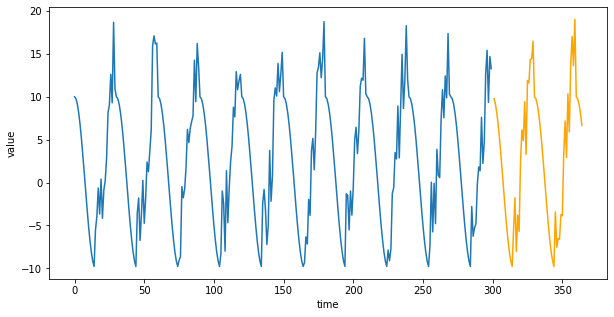

In [ ]:
#시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(365))

#print(time_series)

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
#학습데이터
plt.plot(np.arange(0, 300),  time_series[:300])
#테스트데이터
plt.plot(np.arange(301, 365),  time_series[301:], color='orange')

In [ ]:
#RNN을 위한 데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break
  
  return np.array(train_data), np.array(train_label)

n = 10
train_data, train_label = make_sequence(time_series, n)

train_data = train_data.reshape(-1, n, 1) # -1은 자동을 의미, 자동 x 10 x 1 구조로 변환
train_label = train_label.reshape(-1, 1)

print(train_data.shape)
print(train_label.shape)

#학습 데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

#테스트 데이터
_test_data = train_data[300:]
_test_label = train_label[300:]

print(_train_data.shape)
print(_test_data.shape)


(355, 10, 1)
(355, 1)
(300, 10, 1)
(55, 10, 1)


In [ ]:
#make_sequence 더 확실하게 데이터 이해하기
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
  print(a[i], '|', b[i])

In [ ]:
#모델 구성하기


model = Sequential()

model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 학습하기
model.fit(_train_data, _train_label, epochs=100, batch_size=16)

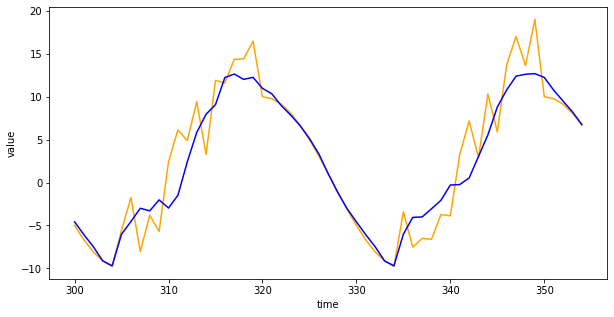

In [ ]:
#예측확인
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label) + len(result))

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label.reshape(-1), color='orange', label='label')
plt.plot(result_range, result.reshape(-1), color='blue', label='result')
plt.show()

